<a href="https://colab.research.google.com/github/randreove/TS/blob/main/notebooks/60_Forecasting%20II%20Deep%20Learning/5_Raw%20vs%20Scaled/B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelling LSTM with Raw and Scaled Data

## Load Dataset

In [1]:
import pandas as pd
df = pd.read_csv('/content/precio_mercado_diario.csv', parse_dates=['datetime_utc'], index_col=0)
df = df.loc["2020":].copy()
df

,Mercado SPOT
datetime_utc,
2020-01-01 00:00:00+00:00,38.60
2020-01-01 01:00:00+00:00,36.55
2020-01-01 02:00:00+00:00,32.32
2020-01-01 03:00:00+00:00,30.85
2020-01-01 04:00:00+00:00,30.14
...,...
2023-08-04 17:00:00+00:00,70.00
2023-08-04 18:00:00+00:00,86.30
2023-08-04 19:00:00+00:00,94.00


## Data Preprocessing

### Scale Data

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df)
data_raw = df.values

### Train Test Split

In [3]:
train_raw, test_raw = train_test_split(data_raw, test_size=0.2, shuffle=False)
train_scaled, test_scaled = train_test_split(data_scaled, test_size=0.2, shuffle=False)

### Create Sequences

In [4]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 24 # Use 24 hours prior to predict the following hour
X_train_raw, y_train_raw = create_sequences(train_raw, sequence_length)
X_test_raw, y_test_raw = create_sequences(test_raw, sequence_length)

X_train_scaled, y_train_scaled = create_sequences(train_scaled, sequence_length)
X_test_scaled, y_test_scaled = create_sequences(test_scaled, sequence_length)

## Modelling

In [5]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import LSTM, Dense, Input

from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

from sklearn.metrics import mean_squared_error

### Raw Data

In [6]:
import tensorflow as tf
from keras.utils import set_random_seed

set_random_seed(123)
tf.config.experimental.enable_op_determinism()

In [7]:
model_raw = Sequential(layers=[
    Input(shape=(X_train_raw.shape[1], X_train_raw.shape[2])),
    LSTM(50),
    Dense(1)
])

model_raw.compile(optimizer='adam', loss='mean_squared_error')

history_raw = model_raw.fit(
    X_train_raw, y_train_raw, epochs=50, batch_size=64, verbose=0,
    validation_data=(X_test_raw, y_test_raw), callbacks=[early_stop])

In [8]:
history_raw.history

{'loss': [15007.30859375,
  11910.2041015625,
  9874.67578125,
  8235.00390625,
  6877.291015625,
  5748.0322265625,
  4805.7265625,
  4015.74365234375,
  3351.960693359375,
  2798.595947265625,
  2299.88671875,
  1909.686767578125,
  1601.7244873046875,
  1355.008056640625,
  1157.4859619140625,
  997.0938110351562,
  867.8557739257812,
  760.712646484375,
  674.3251953125,
  603.1515502929688,
  542.4379272460938,
  490.9740295410156,
  446.02996826171875,
  407.9807434082031,
  374.2419738769531],
 'val_loss': [6389.240234375,
  4496.05810546875,
  3123.538818359375,
  2118.485107421875,
  1408.4169921875,
  925.1981811523438,
  605.9984741210938,
  404.4322814941406,
  279.9071350097656,
  209.1422119140625,
  169.5042724609375,
  157.5240936279297,
  148.0865936279297,
  142.54571533203125,
  136.32115173339844,
  134.39639282226562,
  132.2352752685547,
  125.4146499633789,
  125.05131530761719,
  123.38223266601562,
  124.3336410522461,
  125.13495635986328,
  128.21878051757812

### Scaled Data

In [9]:
import tensorflow as tf
from keras.utils import set_random_seed

set_random_seed(123)
tf.config.experimental.enable_op_determinism()

In [10]:
model_scaled = Sequential(layers=[
    Input(shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    LSTM(50),
    Dense(1)
])

model_scaled.compile(optimizer='adam', loss='mean_squared_error')

history_scaled = model_scaled.fit(
    X_train_scaled, y_train_scaled, epochs=50, batch_size=64, verbose=0,
    validation_data=(X_test_scaled, y_test_scaled), callbacks=[early_stop])

In [11]:
history_scaled.history

{'loss': [0.0019352957606315613,
  0.0008566398173570633,
  0.000480975751997903,
  0.0003060595481656492,
  0.00025733152870088816,
  0.000234931634622626,
  0.00022582391102332622,
  0.0002178160211769864,
  0.00021178128372412175,
  0.00020591371867340058,
  0.00020003988174721599,
  0.00019651689217425883,
  0.000194011940038763,
  0.00019151812011841685,
  0.00018870313942898065,
  0.0001857635797932744,
  0.00018308065773453563,
  0.00018090233788825572,
  0.00017927541921380907,
  0.00017806992400437593,
  0.00017712786211632192,
  0.00017634885443840176,
  0.00017568064504303038,
  0.00017509768076706678,
  0.00017458363436162472,
  0.0001741242449497804,
  0.0001737063576001674,
  0.0001733195094857365,
  0.00017295659927185625,
  0.00017261250468436629,
  0.0001722840388538316,
  0.0001719686551950872,
  0.00017166536417789757,
  0.00017137298709712923,
  0.00017109065083786845,
  0.0001708178606349975,
  0.00017055359785445035,
  0.00017029729497153312,
  0.00017004844266921

### Compare History

In [ ]:
import sys
sys.path.append('../')

In [ ]:
import utils

df_history = utils.process_df_history(history_raw, history_scaled)
df_history

,variable,value
epoch,,
0,raw,14989.680664
1,raw,11894.836914
...,...,...
48,scaled,0.000168
49,scaled,0.000168


In [15]:
import pandas as pd

def create_val_loss_dataframe(history_raw, history_scaled):
    # Crear dataframes de cada historia con solo val_loss
    df_raw = pd.DataFrame({'epoch': range(len(history_raw.history['val_loss'])),
                           'value': history_raw.history['val_loss']})
    df_raw['variable'] = 'val_loss'
    df_raw['model'] = 'raw'

    df_scaled = pd.DataFrame({'epoch': range(len(history_scaled.history['val_loss'])),
                              'value': history_scaled.history['val_loss']})
    df_scaled['variable'] = 'val_loss'
    df_scaled['model'] = 'scaled'

    # Concatenar ambos dataframes
    df_combined = pd.concat([df_raw, df_scaled], ignore_index=True)

    return df_combined

# Ejemplo de uso
# df_val_loss = create_val_loss_dataframe(model_raw.history, model_scaled.history)
# print(df_val_loss)


In [16]:
df_history = create_val_loss_dataframe(history_raw, history_scaled)
display(df_history)

,epoch,value,variable,model
0,0,6389.240234,val_loss,raw
1,1,4496.058105,val_loss,raw
2,2,3123.538818,val_loss,raw
3,3,2118.485107,val_loss,raw
4,4,1408.416992,val_loss,raw
...,...,...,...,...
70,45,0.000247,val_loss,scaled
71,46,0.000247,val_loss,scaled
72,47,0.000247,val_loss,scaled
73,48,0.000247,val_loss,scaled


In [17]:
import plotly.express as px

fig = px.line(data_frame=df_history, x=df_history.index, y='value', facet_col='variable')
fig.update_yaxes(matches=None)

### Predictions

In [18]:
y_pred_raw = model_raw.predict(X_test_raw)

y_pred_scaled = model_scaled.predict(X_test_scaled)
y_pred_scaled_inverse = scaler.inverse_transform(y_pred_scaled)

197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


#### Create DataFrame

In [ ]:
import utils

dic_pred = {
    'y_true': y_test_raw,
    'y_pred_raw': y_pred_raw,
    'y_pred_scaled': y_pred_scaled,
    'y_pred_scaled_inverse': y_pred_scaled_inverse
}

df_pred = utils.process_df_pred(df, y_test_raw, dic_pred)
df_pred

/Users/sota/Library/CloudStorage/Dropbox/2 Business/1 Datons/2 Areas/Courses/22 TS/solutions-new/notebooks/60_Forecasting II Deep Learning/5_Raw vs Scaled/../utils.py:10: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



,y_true,y_pred_raw,y_pred_scaled,y_pred_scaled_inverse
2022-11-15 22:00:00+00:00,105.00,120.572891,0.176569,123.598396
2022-11-15 23:00:00+00:00,90.52,97.767250,0.142898,100.028641
...,...,...,...,...
2023-08-04 20:00:00+00:00,94.00,93.772896,0.134413,94.089241
2023-08-04 21:00:00+00:00,91.70,89.533813,0.130322,91.225449


In [19]:
def process_df_pred(df, y_true, dic_pred):
    """
    Toma un DataFrame original con un índice de fechas más amplio, los valores reales de y_test
    y un diccionario de predicciones. Devuelve un DataFrame con el índice de fechas correspondiente
    a los valores de y_true y las predicciones.

    Parámetros:
    - df: DataFrame original con un índice de fechas.
    - y_true: Serie o array de valores reales (y_test).
    - dic_pred: Diccionario con predicciones, donde la clave es el nombre del modelo y el valor es la Serie o array de predicciones.

    Retorna:
    - DataFrame con el índice de fechas y columnas de valores reales y predicciones.
    """
    # Asegurarse de que y_true sea 1D
    if len(y_true.shape) > 1:
        y_true = y_true.ravel()

    # Asegurar que cada predicción en dic_pred sea 1D
    for model_name in dic_pred:
        if len(dic_pred[model_name].shape) > 1:
            dic_pred[model_name] = dic_pred[model_name].ravel()

    # Suponemos que y_true y dic_pred tienen un índice que coincide con una parte del índice de df
    common_index = df.index[-len(y_true):]  # Toma las últimas posiciones para que coincidan con y_true

    # Crear un DataFrame base con el índice común y y_true
    df_result = pd.DataFrame(index=common_index, data={'y_true': y_true})

    # Añadir las predicciones al DataFrame
    for model_name, pred in dic_pred.items():
        df_result[model_name] = pred

    return df_result

# Ejemplo de uso:
# resultado = process_df_pred(df, y_test, dic_pred)

In [21]:
dic_pred = {
    'y_true': y_test_raw,
    'y_pred_raw': y_pred_raw,
    'y_pred_scaled': y_pred_scaled,
    'y_pred_scaled_inverse': y_pred_scaled_inverse
}

df_pred = process_df_pred(df, y_test_raw, dic_pred)
df_pred

,y_true,y_pred_raw,y_pred_scaled,y_pred_scaled_inverse
datetime_utc,,,,
2022-11-15 22:00:00+00:00,105.00,122.747108,0.176569,123.598381
2022-11-15 23:00:00+00:00,90.52,89.729576,0.142898,100.028641
2022-11-16 00:00:00+00:00,87.00,81.404831,0.126836,88.785225
2022-11-16 01:00:00+00:00,85.00,83.837402,0.124414,87.089653
2022-11-16 02:00:00+00:00,84.92,85.746956,0.124134,86.893784
...,...,...,...,...
2023-08-04 17:00:00+00:00,70.00,58.205029,0.082758,57.930618
2023-08-04 18:00:00+00:00,86.30,83.877861,0.115022,80.515167
2023-08-04 19:00:00+00:00,94.00,93.864655,0.131397,91.977707


#### Visualize Data

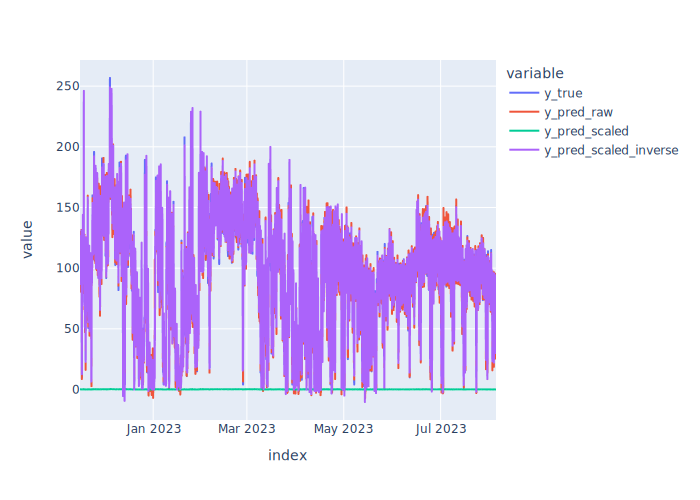

In [ ]:
utils.plot_df(df_pred)

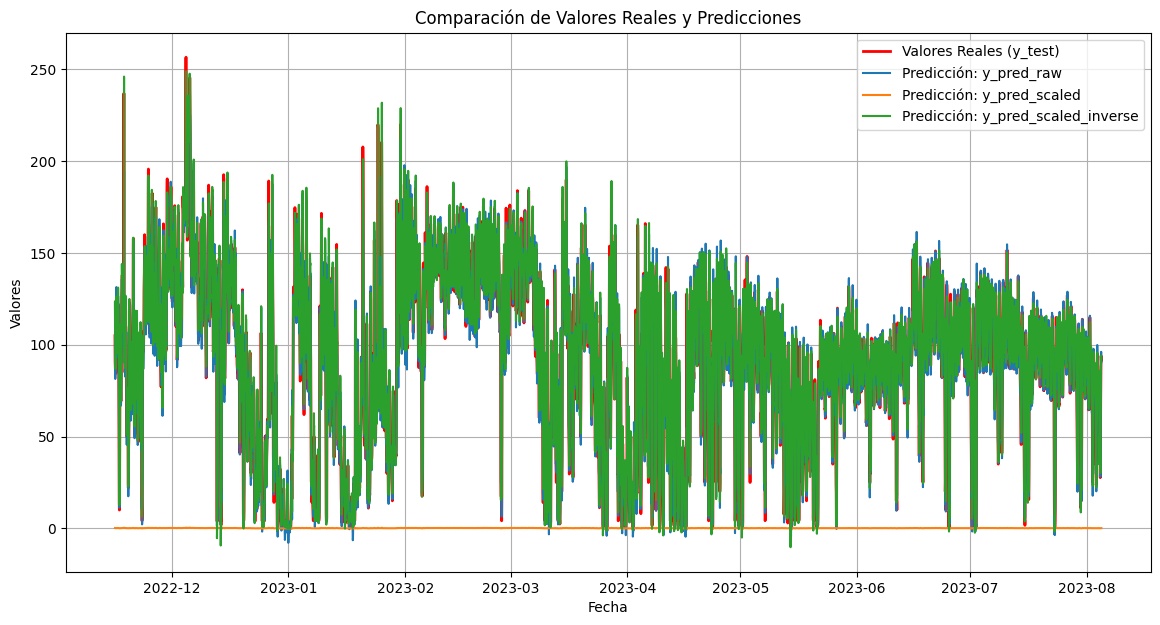

In [22]:
import matplotlib.pyplot as plt

def plot_predictions(df_pred):
    """
    Genera una gráfica de los valores reales y las predicciones.

    Parámetros:
    - df_pred: DataFrame que contiene la columna 'y_true' con los valores reales y
               otras columnas con las predicciones de distintos modelos.
    """
    plt.figure(figsize=(14, 7))

    # Graficar la columna de valores reales
    plt.plot(df_pred.index, df_pred['y_true'], label='Valores Reales (y_test)', linewidth=2, color='red')

    # Graficar cada columna de predicciones
    for col in df_pred.columns:
        if col != 'y_true':
            plt.plot(df_pred.index, df_pred[col], label=f'Predicción: {col}')

    plt.title('Comparación de Valores Reales y Predicciones')
    plt.xlabel('Fecha')
    plt.ylabel('Valores')
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejemplo de uso:
plot_predictions(df_pred)

In [23]:
df_pred_2 = df_pred.loc['2023-08-02':].copy()
df_pred_2

,y_true,y_pred_raw,y_pred_scaled,y_pred_scaled_inverse
datetime_utc,,,,
2023-08-02 00:00:00+00:00,96.09,94.787521,0.137127,95.988907
2023-08-02 01:00:00+00:00,96.09,95.682510,0.138568,96.997414
2023-08-02 02:00:00+00:00,94.09,96.505432,0.140182,98.127182
2023-08-02 03:00:00+00:00,94.09,93.858376,0.139059,97.341370
2023-08-02 04:00:00+00:00,93.86,95.409546,0.140963,98.674438
...,...,...,...,...
2023-08-04 17:00:00+00:00,70.00,58.205029,0.082758,57.930618
2023-08-04 18:00:00+00:00,86.30,83.877861,0.115022,80.515167
2023-08-04 19:00:00+00:00,94.00,93.864655,0.131397,91.977707


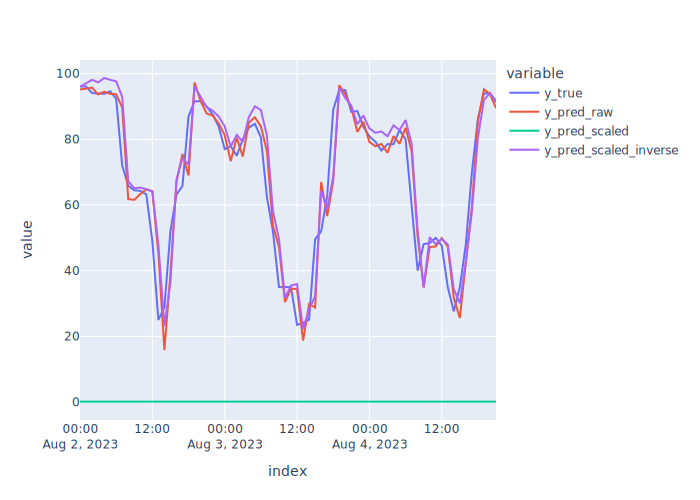

In [ ]:
utils.plot_df(df_pred_2)

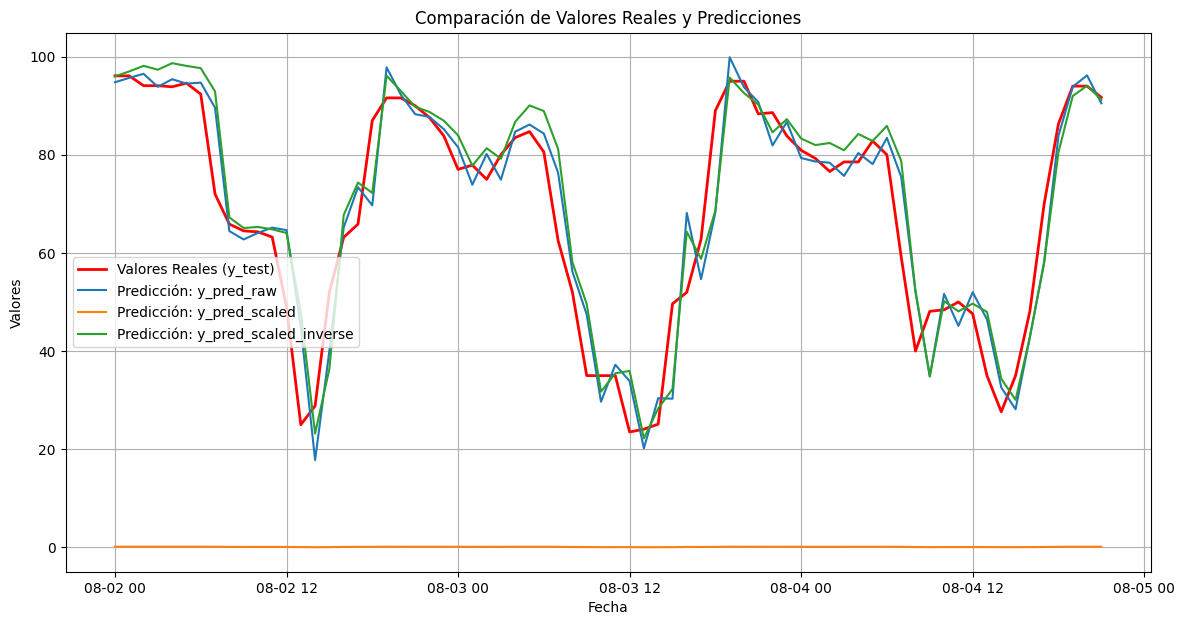

In [25]:
plot_predictions(df_pred_2)

### Evaluation

In [26]:
mean_squared_error(y_test_raw, y_pred_scaled_inverse, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



10.987226540751445

In [27]:
mean_squared_error(y_test_raw, y_pred_raw, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



11.107755816503255